### In this project , we have to classify the DNA sequence into perticular class

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_table("human_data.txt")
df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


### Treating DNA sequence as a "language", otherwise known as k-mer counting
A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

The method I use here is simple and easy. I first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

Here I am using hexamer “words” but that is arbitrary and word length can be tuned to suit the particular situation. The word length and amount of overlap need to be determined empirically for any given application.

In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.

Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:


### Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [3]:
# lets define a funciton to convert seqeunce into fixed length string . default size = 6 (hexamer)
def getkmers(sequence,size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence))]

### Now we can convert our training data sequences into short overlapping k-mers of legth 6.

In [4]:
df['k_splitted_words'] = df.apply(lambda x : getkmers(x['sequence']),axis = 1)
df = df.drop('sequence',axis=1,)

### Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step. Let's take a look.

In [5]:
df.head()

,class,k_splitted_words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


### Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. Let's do that now.

In [6]:
human_text = list(df['k_splitted_words'])

for item in range(len(human_text)):
    human_text[item] = ' '.join(human_text[item])
    
y_data = df.iloc[:,0].values

In [7]:
print(len(human_text[1]))

4751


In [8]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

### Now we will apply the BAG of WORDS using CountVectorizer using NLP

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(ngram_range=(4,4)) # max_features=2000
X = cv.fit_transform(human_text)

In [11]:
df.columns

Index(['class', 'k_splitted_words'], dtype='object')

<AxesSubplot:>

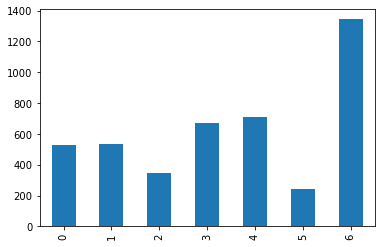

In [12]:
df['class'].value_counts().sort_index().plot.bar()

In [13]:
# splitting the dataset
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42)

In [15]:
X_train.shape , X_test.shape

((3066, 237308), (1314, 237308))

### Multinomial nave bayes algo

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[134   0   0   0   2   0   1]
 [  2 152   0   0   0   0   4]
 [  1   0 112   0   0   0   4]
 [  0   0   0 174   0   0   3]
 [  2   0   0   0 214   0   5]
 [  2   0   0   0   2  71   0]
 [  6   1   0   1   1   0 420]]
0.971841704718417
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       137
           1       0.99      0.96      0.98       158
           2       1.00      0.96      0.98       117
           3       0.99      0.98      0.99       177
           4       0.98      0.97      0.97       221
           5       1.00      0.95      0.97        75
           6       0.96      0.98      0.97       429

    accuracy                           0.97      1314
   macro avg       0.98      0.97      0.97      1314
weighted avg       0.97      0.97      0.97      1314

